# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

## Load the data

In [2]:
raw_data = pd.read_csv('real_estate_price_size_year_view.csv')

In [3]:
raw_data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


## Create a dummy variable for 'view'

In [5]:
data = raw_data.copy()
data['view'] = data['view'].map({'No sea view':0, 'Sea view':1})

In [7]:
data

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


In [8]:
data.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


## Create the regression

### Declare the dependent and the independent variables

In [9]:
y = data['price']
x1 = data[['size', 'view']]

### Regression

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\sabin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           2.44e-46
Time:                        12:16:37   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.000    6.09e+04     9.4e+04
size         218.7521      8.902     24.574      0.000     201.085     236.420
view        5.756e+04   5278.883     10.904      0.000    4.71e+04     6.8e+04
==============================================================================
Omnibus:                       24.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.619
Skew:                           0.896   Prob(JB):                     2.27e-12
Kurtosis:                       6.107   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

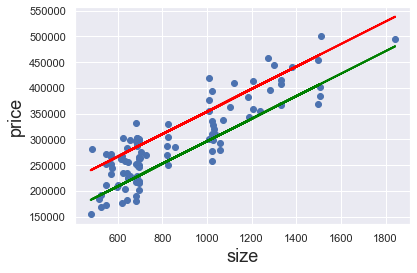

In [13]:
plt.scatter(data['size'], y)
yhat_no = 7.748e+04 + 218.7521 * data['size']
yhat_yes = 7.748e+04 + 5.756e+04 + 218.7521 * data['size']
fig = plt.plot(data['size'], yhat_no, lw=2, c='green')
fig = plt.plot(data['size'], yhat_yes, lw=2, c='red')
plt.xlabel('size', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

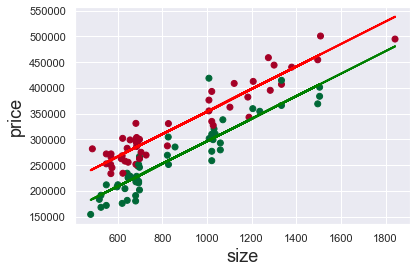

In [15]:
plt.scatter(data['size'], y, c=data['view'],cmap='RdYlGn_r')
yhat_no = 7.748e+04 + 218.7521 * data['size']
yhat_yes = 7.748e+04 + 5.756e+04 + 218.7521 * data['size']
fig = plt.plot(data['size'], yhat_no, lw=2, c='green')
fig = plt.plot(data['size'], yhat_yes, lw=2, c='red')
plt.xlabel('size', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

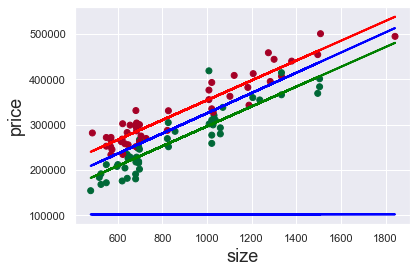

In [16]:
plt.scatter(data['size'], y, c=data['view'],cmap='RdYlGn_r')
yhat_no = 7.748e+04 + 218.7521 * data['size']
yhat_yes = 7.748e+04 + 5.756e+04 + 218.7521 * data['size']
yhat = 223.18*x1 + 1.019e+05
fig = plt.plot(data['size'], yhat_no, lw=2, c='green')
fig = plt.plot(data['size'], yhat_yes, lw=2, c='red')
fig = plt.plot(data['size'], yhat, lw=2, c='blue')
plt.xlabel('size', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

In [17]:
x

,const,size,view
0,1.0,643.09,0
1,1.0,656.22,0
2,1.0,487.29,1
3,1.0,1504.75,0
4,1.0,1275.46,1
...,...,...,...
95,1.0,549.80,1
96,1.0,1037.44,0
97,1.0,1504.75,0
98,1.0,648.29,0
